<a href="https://colab.research.google.com/github/valdidar/DadJokes_Val_Didar_Extension/blob/main/YOLOv9_Implimentation_on_SIXray_Dattaset_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri May  3 17:41:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [11]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 325 (delta 158), reused 155 (delta 155), pack-reused 109
Receiving objects: 100% (325/325), 2.23 MiB | 15.16 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9/yolov9


[`roboflow`](https://pypi.org/project/roboflow) package, used to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [12]:
!pip install -q roboflow

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [13]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [14]:
!ls -la {HOME}/weights

total 804872
drwxr-xr-x 2 root root      4096 May  3 17:44 .
drwxr-xr-x 1 root root      4096 May  3 17:42 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt.1
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt.1
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt.1
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt.1


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

## yolov9-e

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [16]:
%cd {HOME}/yolov9

/content/yolov9


In [18]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("val-didar-singh").project("xray-prohibited-object-detection")
version = project.version(1)
dataset = version.download("yolov9")

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


In [19]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 30 --img 320 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-03 17:49:23.210472: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 17:49:23.210524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 17:49:23.212023: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 17:49:24.334768: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/Xray-Prohibited-Object-detection-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=30, batch_size=16, imgsz=320, rect=False, resume

## Examine Training Results


**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [20]:
!zip -r /content/exp.zip /content/yolov9/runs/train/exp

  adding: content/yolov9/runs/train/exp/ (stored 0%)
  adding: content/yolov9/runs/train/exp/R_curve.png (deflated 8%)
  adding: content/yolov9/runs/train/exp/hyp.yaml (deflated 42%)
  adding: content/yolov9/runs/train/exp/labels_correlogram.jpg (deflated 31%)
  adding: content/yolov9/runs/train/exp/results.png (deflated 10%)
  adding: content/yolov9/runs/train/exp/confusion_matrix.png (deflated 29%)
  adding: content/yolov9/runs/train/exp/val_batch0_labels.jpg (deflated 15%)
  adding: content/yolov9/runs/train/exp/PR_curve.png (deflated 10%)
  adding: content/yolov9/runs/train/exp/P_curve.png (deflated 10%)
  adding: content/yolov9/runs/train/exp/opt.yaml (deflated 49%)
  adding: content/yolov9/runs/train/exp/train_batch1.jpg (deflated 7%)
  adding: content/yolov9/runs/train/exp/F1_curve.png (deflated 7%)
  adding: content/yolov9/runs/train/exp/weights/ (stored 0%)
  adding: content/yolov9/runs/train/exp/weights/best_striped.pt (deflated 8%)
  adding: content/yolov9/runs/train/exp/wei

In [21]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1714758565.4d3bd0d733f7.3614.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


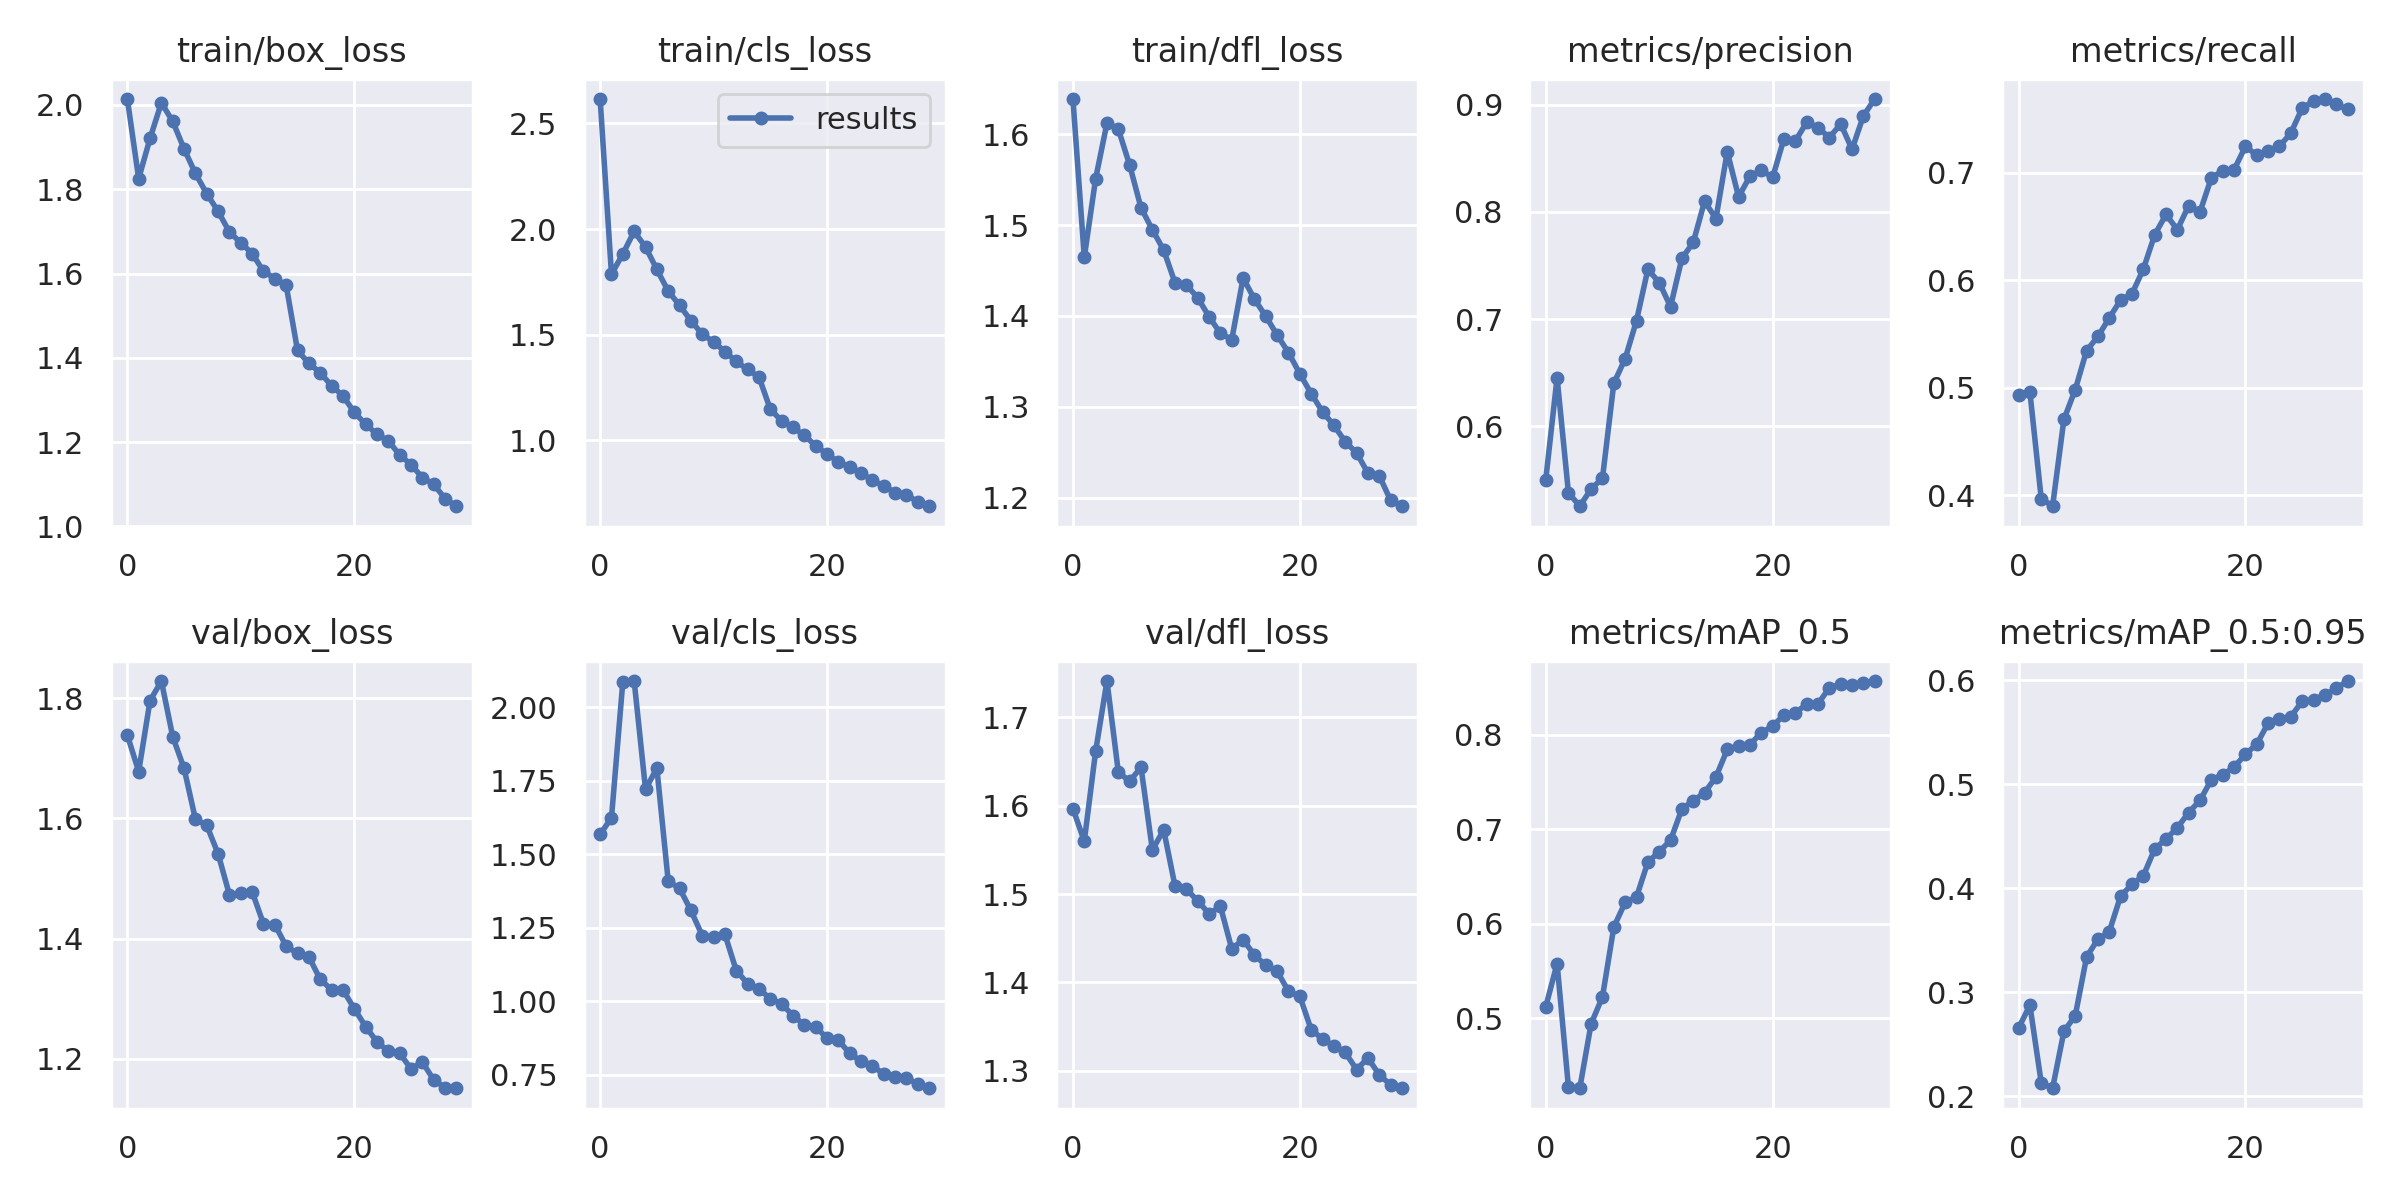

In [22]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

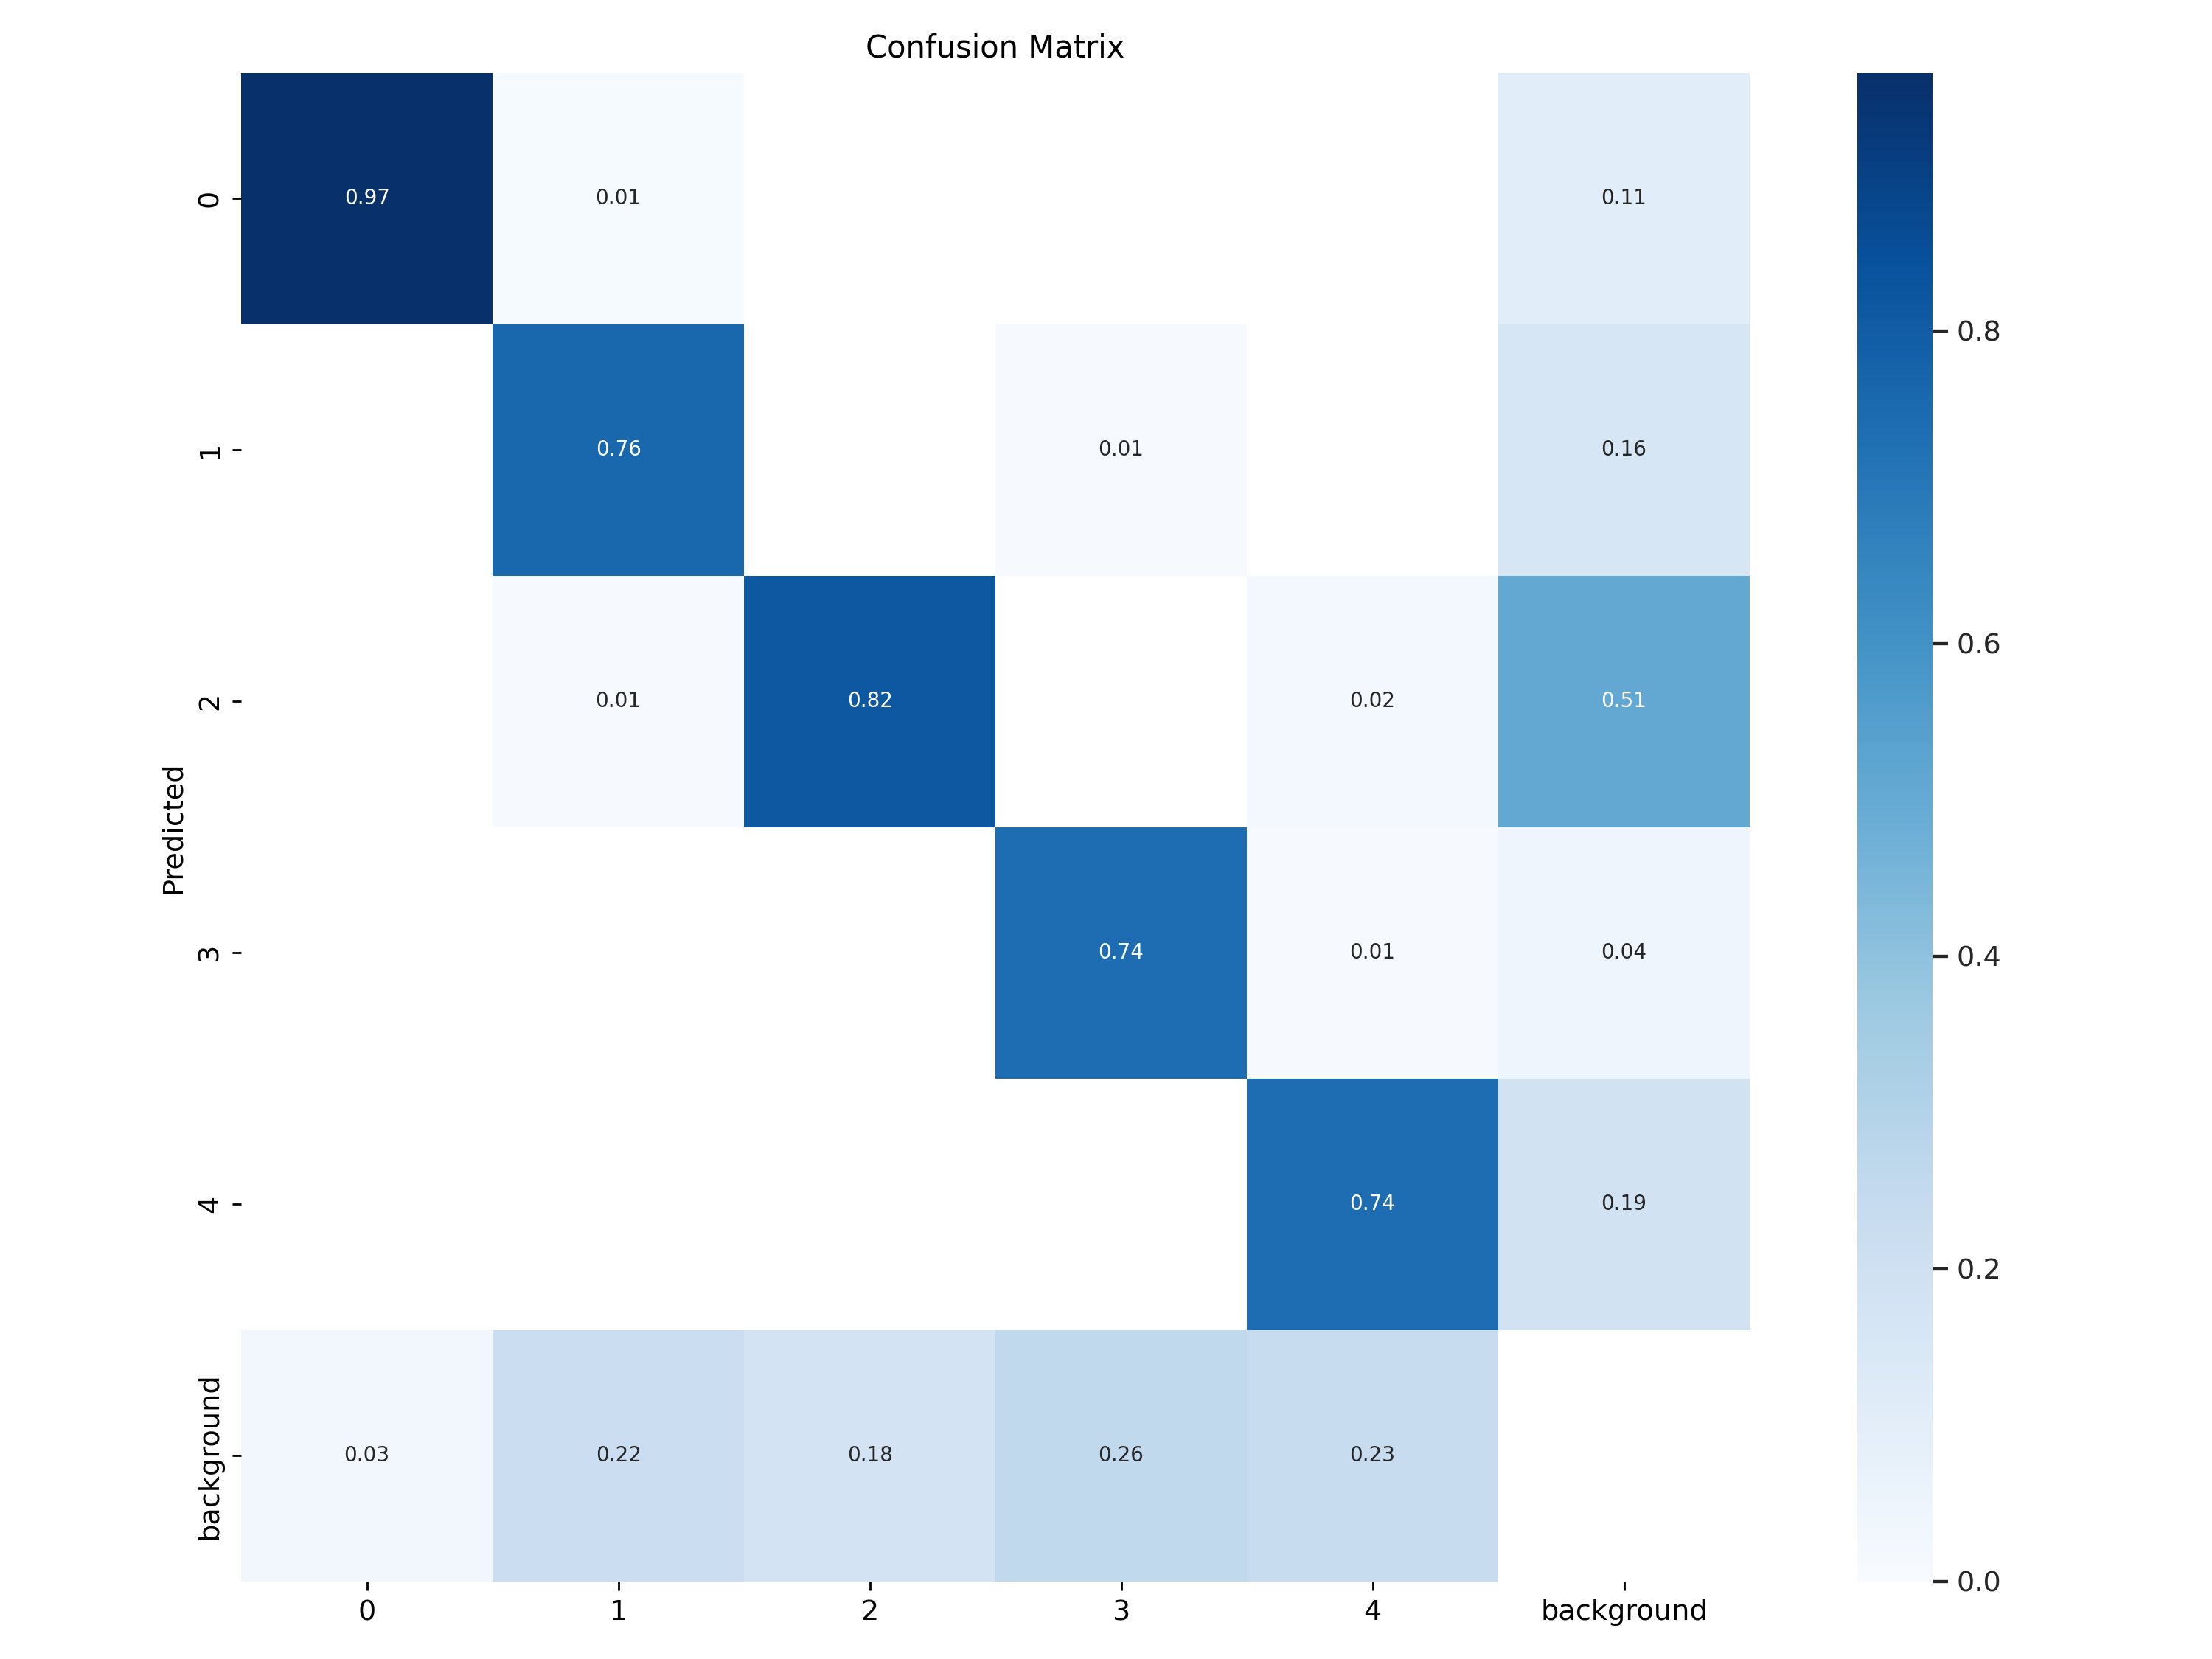

In [23]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

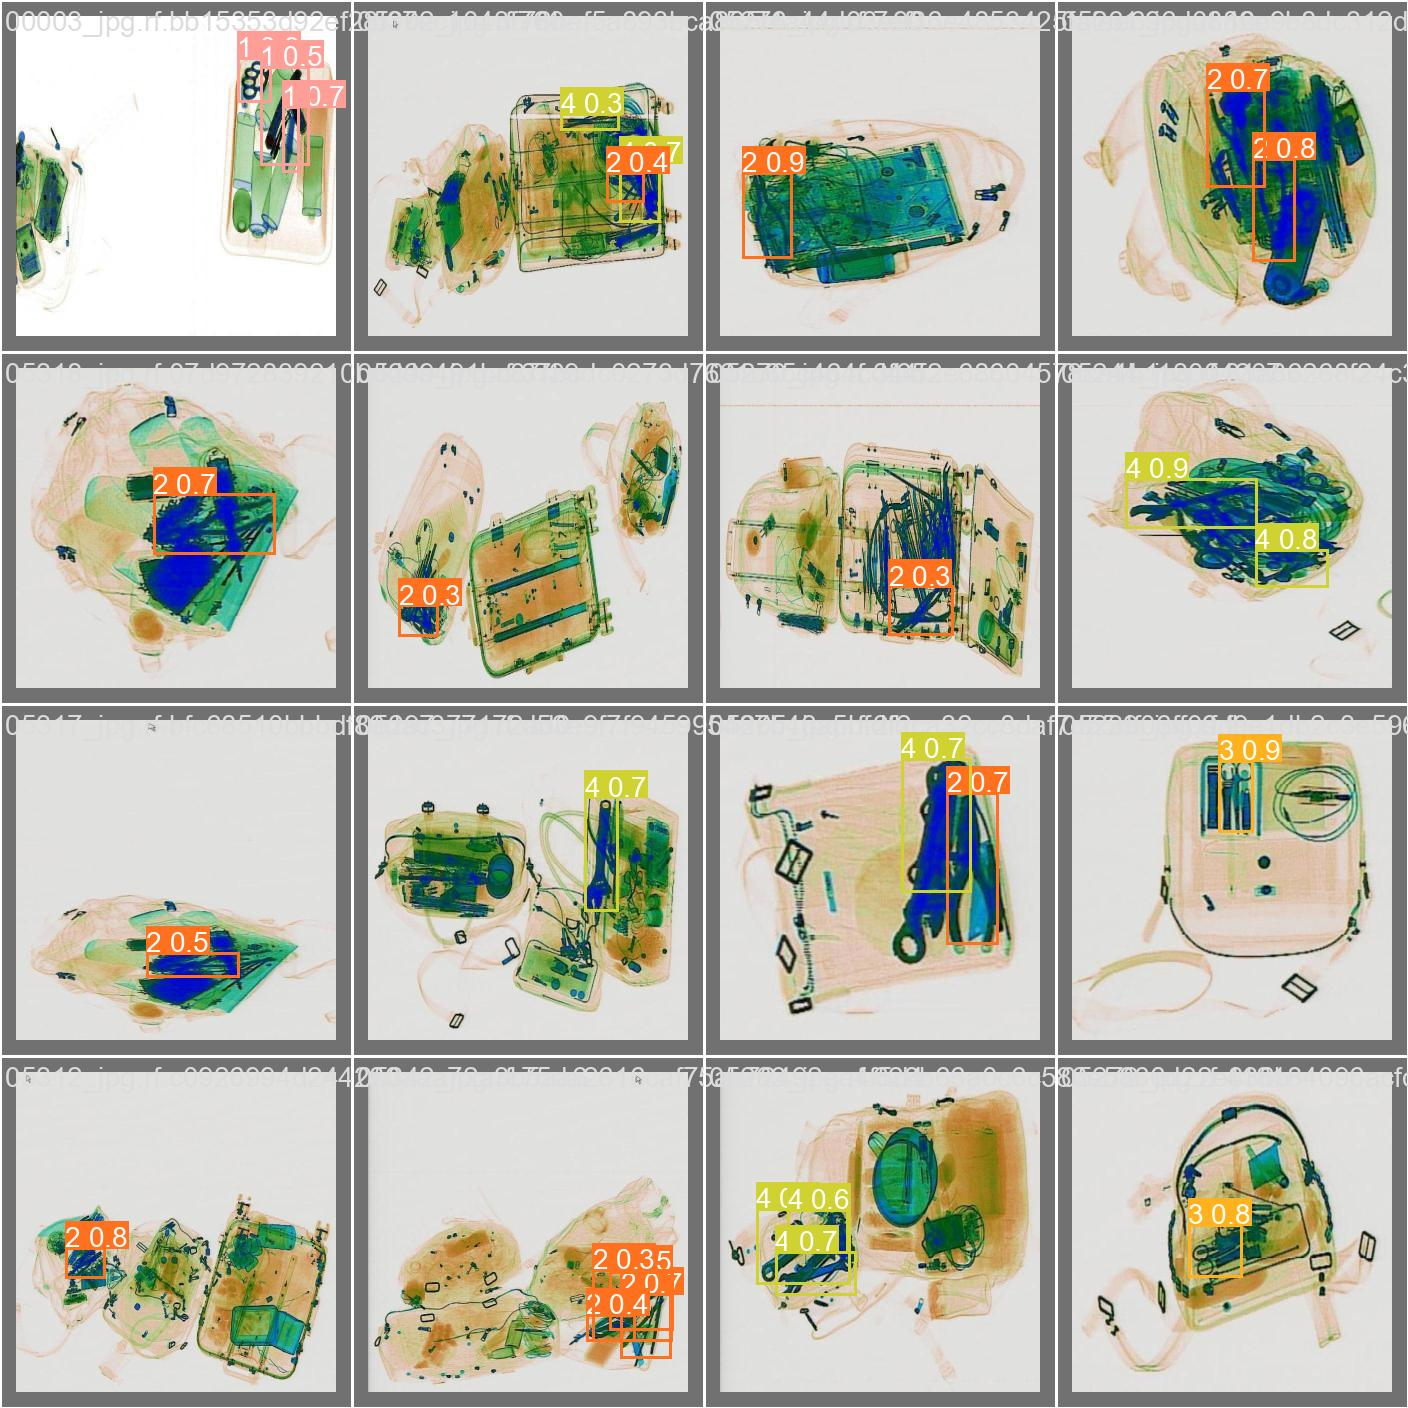

In [24]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [25]:
%cd {HOME}/yolov9

!python val.py \
--img 320 --batch 32 --conf 0.001 --iou 0.6 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt # best one for results


/content/yolov9
val: data=/content/yolov9/Xray-Prohibited-Object-detection-1/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/Xray-Prohibited-Object-detection-1/valid/labels.cache... 1163 images, 0 backgrounds, 0 corrupt: 100% 1163/1163 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = 

## Inference with Custom Model

In [26]:
!python detect.py \
--img 320 --conf 0.3 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/Xray-Prohibited-Object-detection-1/test/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
image 1/589 /content/yolov9/Xray-Prohibited-Object-detection-1/test/images/00014_jpg.rf.612f3ff61088bd8f895bbcbe20057dc3.jpg: 320x320 2 0s, 1 1, 27.4ms
image 2/589 /content/yolov9/Xray-Prohibited-Object-detection-1/test/images/00048_jpg.rf.8d310a78efd5d5602383b4616166f59f.jpg: 320x320 2 1s, 2

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

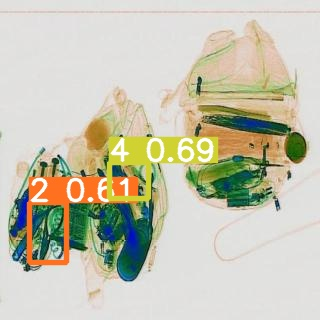

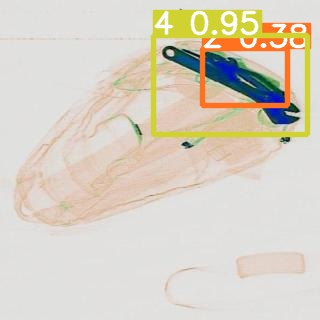

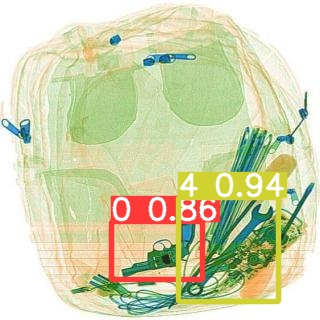

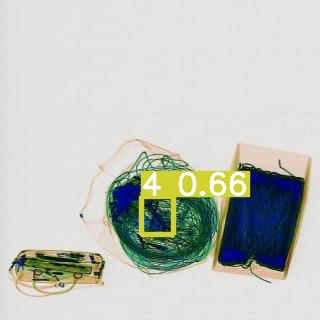

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[1:5]:
      display(Image(filename=image_path, width=600))